# Introduction

This is my approach to the ["Tell a Data Story" performance task](https://github.com/albemlee/PTPracticeData/blob/master/U2L15%20Practice%20PT%20Overview%20and%20Rubric%20-%20Tell%20a%20Data%20Story.pdf) from Code.org's Computer Science Principles Cirriculum. Given that I have additional data science tools and techniques at my disposal, my results are going to differ from yours. However, there should still be similarities in the overall approach to the task.

## Download the dataset

I downloaded the survey responses from [Google Drive](https://docs.google.com/spreadsheets/d/1ayMM9Rcr_wHoS4kcz9LpJ9ejIPvJIS4MUv_tIJNDPU4/edit?usp=sharing) as a csv file and named it ["data.csv"](https://github.com/albemlee/PTPracticeData/blob/master/data.csv) The code below loads it into my workspace and saves it into a dataframe called "data".

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

Let's take a look to see what our data looks like.

In [2]:
data.head()

,Timestamp,How many hours did you sleep last night?,"How many hours did you work (e.g. do homework, or a job) after you left school?",How many hours did you spend relaxing after you left school?,What did you do to relax last night?,How do you feel today?,Which best describes you (your answer should be the same every day)
0,10/23/2017 8:04:21,6 1/2,3,0,0,Good,Youngest Siblling
1,10/23/2017 8:04:52,7,1,4,watch tv,Good,Oldest Sibling
2,10/23/2017 8:05:23,7,6,1,Sleep,Meh,Oldest Sibling
3,10/23/2017 8:05:30,6,7,0,Took a nap,Meh,Oldest Sibling
4,10/23/2017 8:05:36,6.5,2,4,Watch Netflix,Good,Youngest Siblling


It looks like we have 110 rows and 7 columns.

## Clean the dataset

#### Rename Columns

I am not a fan of the column names, so I am first going to rename the columns. I prefer names that are short, and I am going to use a convention call [camelcase](https://en.wikipedia.org/wiki/Camel_case).

In [3]:
data.columns = ['TimeStamp', 'HoursSleep', 'HoursWork', 'HoursRelaxing', 'RelaxActivity', 'Feel', 'PersonalDescription']
data.head()

,TimeStamp,HoursSleep,HoursWork,HoursRelaxing,RelaxActivity,Feel,PersonalDescription
0,10/23/2017 8:04:21,6 1/2,3,0,0,Good,Youngest Siblling
1,10/23/2017 8:04:52,7,1,4,watch tv,Good,Oldest Sibling
2,10/23/2017 8:05:23,7,6,1,Sleep,Meh,Oldest Sibling
3,10/23/2017 8:05:30,6,7,0,Took a nap,Meh,Oldest Sibling
4,10/23/2017 8:05:36,6.5,2,4,Watch Netflix,Good,Youngest Siblling


Now that the columns are renamed, let's see if we can get each column to a standard format

#### Reformat Timestamp

Let's convert the data type in the "TimeStamp" column to [datetime](https://docs.python.org/3/library/datetime.html).

In [4]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

In [5]:
data['TimeStamp'].head()

0   2017-10-23 08:04:21
1   2017-10-23 08:04:52
2   2017-10-23 08:05:23
3   2017-10-23 08:05:30
4   2017-10-23 08:05:36
Name: TimeStamp, dtype: datetime64[ns]

#### Reformat HoursSleep

I want all the data in this column to be decimal numbers. Let's start by removing "hours" from each cell.

In [6]:
HourRep = [' hours', 'hours',' Hours', ' hrs', ' Hrs', ' HRS']
def remove_hours(data, column, HourRep):
    for hr in HourRep:
        data[column] = data[column].str.replace(hr, '')
    return(data)

In [7]:
data = remove_hours(data, 'HoursSleep', HourRep)
data['HoursSleep'].head()

0    6 1/2
1        7
2        7
3        6
4      6.5
Name: HoursSleep, dtype: object

Next, let's convert written out versions of the hours to the number

In [8]:
str_to_int = {'zero': 0,
              'one': 1,
              'two': 2,
              'three': 3,
              'four': 4,
              'five': 5,
              'six': 6,
              'seven': 7,
              'eight': 8,
              'nine': 9,
              'ten': 10,
              'Zero': 0,
              'One': 1,
              'Two':2,
              'Three': 3,
              'Four': 4,
              'Five': 5,
              'Six': 6,
              'Seven': 7,
              'Eight': 8,
              'Nine': 9,
              'Ten': 10,
             }

In [9]:
def convert_str_to_digit(data, column, str_to_int):
    for i, row in data.iterrows():
        for number, digit in str_to_int.items():
            if number in str(data.loc[i, column]):
                data.loc[i, column] = data.loc[i, column].replace(number, str(digit))
    return(data)

In [10]:
data = convert_str_to_digit(data, 'HoursSleep', str_to_int)
data['HoursSleep'].head()

0    6 1/2
1        7
2        7
3        6
4      6.5
Name: HoursSleep, dtype: object

It looks like most of the rows are starting to look standardized, but there are still a few outliers such as "1/2" and ":45." Let's address those too.

In [11]:
bad_list = {' 1/2':'.5',
            ':45':'.75',
            'None':'0',
           }

In [12]:
def remove_bad_stuff(data, column, bad_list):
    for i, row in data.iterrows():
        for bad, good in bad_list.items():
            if bad in str(data.loc[i, column]):
                data.loc[i, column] = data.loc[i, column].replace(bad, good)
    return(data)

In [13]:
data = remove_bad_stuff(data, 'HoursSleep', bad_list)
data['HoursSleep'].head()

0    6.5
1      7
2      7
3      6
4    6.5
Name: HoursSleep, dtype: object

There are a few columns that don't seem to be numbers (like 'x'). Let's remove those columns from our data,

In [14]:
def remove_nonnumbers(data, column):
    for i, row in data.iterrows():
        try:
            data.loc[i, column] = pd.to_numeric(data.loc[i, column])
        except:
            data = data.drop(i)
    data[column] = pd.to_numeric(data[column])
    return(data)

In [15]:
data = remove_nonnumbers(data, 'HoursSleep')
data['HoursSleep'].head()

0    6.5
1    7.0
2    7.0
3    6.0
4    6.5
Name: HoursSleep, dtype: float64

Just to summarize, the steps I took to clean the HoursSleep column are:
1. remove "hours" (i.e. "6 hours" -> 6)
2. convert string values to numbers (i.e. "six" -> 6)
3. convert any additional outlier formats to numbers (i.e. "6 1/2" -> 6.5)
4. remove columns that are not numbers (i.e. "x" is removed)

#### Reformat HoursWork

It looks like HoursWork should be in the same format as HoursSleep. Let's apply the same heuristics we used for HoursSleep to HoursWork.

In [16]:
def clean_hours_columns(data, column, HourRep, str_to_int, bad_list):
    data = remove_hours(data, column, HourRep)
    data = convert_str_to_digit(data, column, str_to_int)
    data = remove_bad_stuff(data, column, bad_list)
    data = remove_nonnumbers(data, column)
    return(data)

In [17]:
data = clean_hours_columns(data, 'HoursWork', HourRep, str_to_int, bad_list)
data['HoursWork'].head()

0    3
1    1
2    6
3    7
4    2
Name: HoursWork, dtype: int64

#### Reformat HoursRelaxing

Seems like the same deal with HoursRelaxing. Let's do the same thing.

In [18]:
data = clean_hours_columns(data, 'HoursRelaxing', HourRep, str_to_int, bad_list)
data['HoursRelaxing'].head()

0    0.0
1    4.0
2    1.0
3    0.0
4    4.0
Name: HoursRelaxing, dtype: float64

#### Reformat RelaxActivity

The data is already all in text format. I am going to make the assumption that legitimate responses are at least 3 characters long and delete responses that are less than 4 characters long.

In [19]:
def remove_short_responses(data, column, cutoff):
    for i, row in data.iterrows():
        if len(str(data.loc[i, column])) <= cutoff:
            data.loc[i, column] = ""
    return(data)

In [20]:
data = remove_short_responses(data, 'RelaxActivity', 3)
data['RelaxActivity'].head()

0                 
1         watch tv
2            Sleep
3       Took a nap
4    Watch Netflix
Name: RelaxActivity, dtype: object

A few responses are "nothing." I will go ahead and delete those too.

In [21]:
nothing = ['Nothing', 'nothing']
def remove_nothing(data, column, nothing):
    for i, row in data.iterrows():
        data.loc[i, column] = data.loc[i, column].replace('.', ' ')
        data.loc[i, column] = data.loc[i, column].replace('&', ' ')
        data.loc[i, column] = data.loc[i, column].replace('/', ' ')
        for word in nothing:
            if word in str(data.loc[i, column]):
                data.loc[i, column] = ""
    return(data)

In [22]:
data = remove_nothing(data, 'RelaxActivity', nothing)
data['RelaxActivity'].head()

0                 
1         watch tv
2            Sleep
3       Took a nap
4    Watch Netflix
Name: RelaxActivity, dtype: object

Scanning through the responses, it seems like the activities fell into a few big categories:
1. Watching videos
2. Resting
3. Food and Drink
4. Socialize
5. Other

Let's create binary columns (1:yes, 0:no) for each of those categories based on keywords in the responses. This is called [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f).

In [23]:
KeywordGroup1 = ['watch', 'Watch', 'tv', 'television', 'netflix', 'Netflix', 'TV', 'Youtube', 'YouTube', 'youtube', 'Binge']
KeywordGroup2 = ['sleep', 'Sleep', 'laid', 'laying', 'down', 'Napped', 'Nap', 'nap', 'slept', 'Slept', 'bed']
KeywordGroup3 = ['food', 'Food', 'eat', 'Eat', 'Drink', 'drink', 'ate', 'drank']
KeywordGroup4 = ['talked', 'Talked', 'facetime', 'Texted', 'texted', 'Facetime', 'phone', 'friends', 'boyfriend', 'girlfriend']

def identify_categories(data, column, KeywordGroup1, KeywordGroup2, KeywordGroup3, KeywordGroup4):
    data['WatchVideo'] = 0
    data['Rest'] = 0
    data['EatDrink'] = 0
    data['Socialize'] = 0
    data['Other'] = 0
    data['NoResponse'] = 0
    for i, row in data.iterrows():
        for keyword in KeywordGroup1:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'WatchVideo'] = 1
        for keyword in KeywordGroup2:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'Rest'] = 1
        for keyword in KeywordGroup3:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'EatDrink'] = 1
        for keyword in KeywordGroup4:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'Socialize'] = 1
        if data.loc[i, column] == '':
            data.loc[i, 'NoResponse'] = 1
        if data.loc[i, 'WatchVideo'] + data.loc[i, 'Rest'] + data.loc[i, 'EatDrink'] + data.loc[i, 'Socialize'] + data.loc[i, 'NoResponse'] == 0:
            data.loc[i, 'Other'] = 1
    return(data)

In [24]:
data = identify_categories(data, 'RelaxActivity', KeywordGroup1, KeywordGroup2, KeywordGroup3, KeywordGroup4)
print(data[['WatchVideo', 'Rest', 'EatDrink', 'Socialize', 'Other', 'NoResponse']][data['Other'] == 1])
# print(data['RelaxActivity'][data['Other'] == 1])

    WatchVideo  Rest  EatDrink  Socialize  Other  NoResponse
45           0     0         0          0      1           0
55           0     0         0          0      1           0
56           0     0         0          0      1           0
57           0     0         0          0      1           0
65           0     0         0          0      1           0
80           0     0         0          0      1           0


#### Reformat Feel

The responses in this column are already in a standard format. However, it seems that the information in this column is ordered, so I will convert this column from string to integer (2: Great, -2: Terrible)

In [25]:
ranks = {'Terrible': -2,
         'Bad': -1,
         'Meh': 0,
         'Good': 1,
         'Great': 2,
        }

def create_ranks(data, column, ranks):
    data[column].replace(ranks, inplace=True)
    return(data)

In [26]:
data = create_ranks(data, 'Feel', ranks)
data['Feel'].head()

0    1
1    1
2    0
3    0
4    1
Name: Feel, dtype: int64

#### Reformat PersonalDescription

Like the responses in the Feel column, the responses in this column are already in a standardized format. Unlike Feel, PersonalDescription isn't rankable, so I won't convert this to integers. I will remove no responses from the dataset.

In [27]:
def remove_nonresponse(data, column):
    for i, row in data.iterrows():
        if data[column].empty:
            data = data.drop(i)
    data.dropna(inplace = True)
    return(data)

In [28]:
data = remove_nonresponse(data, 'PersonalDescription')
data['PersonalDescription'].head()

0    Youngest Siblling
1       Oldest Sibling
2       Oldest Sibling
3       Oldest Sibling
4    Youngest Siblling
Name: PersonalDescription, dtype: object

#### Save Clean Data

Now that I have completed cleaning the data in each column, I will save it in a csv file called [clean_data.csv](https://github.com/albemlee/PTPracticeData/blob/master/clean_data.csv).

In [29]:
data.to_csv('clean_data.csv')

## Exploring the dataset

To explore the dataset, I will use [descriptive models](http://whatis.techtarget.com/definition/descriptive-modeling) on each column. Plots I create here can be found in the [plots folder](https://github.com/albemlee/PTPracticeData/tree/master/Plots).

#### Explore TimeStamp

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

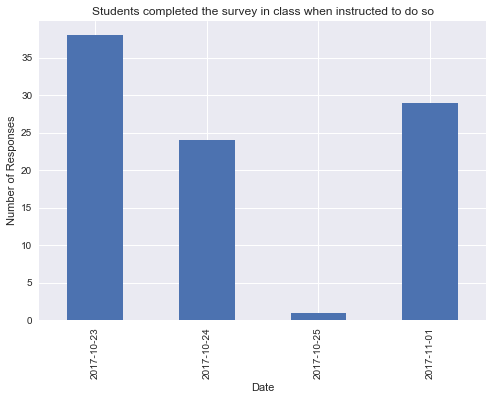

In [31]:
data['TimeStamp'].groupby(data["TimeStamp"].dt.date).count().plot(kind="bar")
plt.title('Students completed the survey in class when instructed to do so')
plt.xlabel('Date')
plt.ylabel('Number of Responses')
plt.savefig('Plots/TimeStamp.png')
plt.show()

We did not get responses consistently on a daily basis, and the responses were within the duration of about a week. Perhaps a better way to collect the responses would have been to assign the survey as a homework assignment rather than setting aside time to do it in class.

10/25 had a only a few responses. My guess is that a few people filled out the survey on 10/25 in an attempt to access the responses.

#### Explore HoursSleep, HoursWork, and HoursRelaxing

HoursSleep, HoursWork, and HoursRelaxing were all decimal numbers. Let's see the distribution of responses for those three columns.

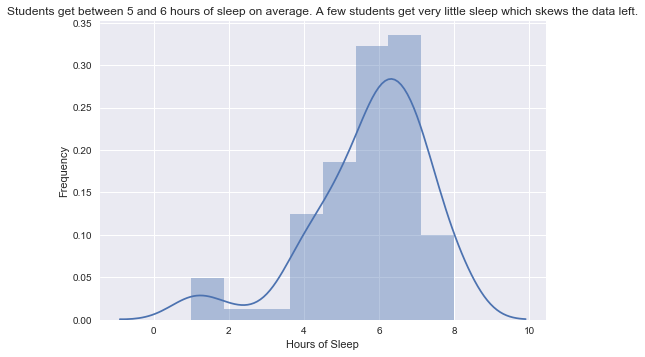

count    92.000000
mean      5.766304
std       1.574960
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       8.000000
Name: HoursSleep, dtype: float64

In [32]:
# HoursSleep
sns.distplot(data['HoursSleep'])
plt.title('Students get between 5 and 6 hours of sleep on average. A few students get very little sleep which skews the data left.')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.savefig('Plots/HoursSleep.png')
plt.show()
data['HoursSleep'].describe()

The distribution was skewed left by students who didn't receive  much sleep. Hopefully this is due to students exaggerating on the survey, but if it isn't, it might be interesting to see what other factors correlates with low sleep.

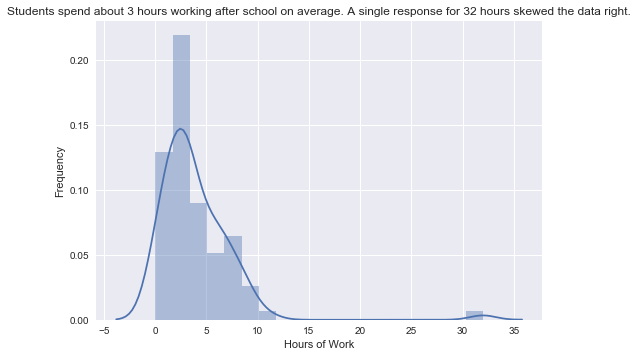

count    92.000000
mean      3.956522
std       3.924880
min       0.000000
25%       2.000000
50%       3.000000
75%       6.000000
max      32.000000
Name: HoursWork, dtype: float64

In [33]:
# HoursWork
sns.distplot(data['HoursWork'])
plt.title('Students spend about 3 hours working after school on average. A single response for 32 hours skewed the data right.')
plt.xlabel('Hours of Work')
plt.ylabel('Frequency')
plt.savefig('Plots/HoursWork.png')
plt.show()
data['HoursWork'].describe()

Another factor which may have skewed the data right is the interpretation of the question. Some students may havae interpretted the qustion as hours spend working in a week instead of hours spent working in a day. A better way to word this question could be "How many hours did you work YESTERDAY after you left school?" Given this ambiguity, I am not going to use the HoursWork column for any predictive models.

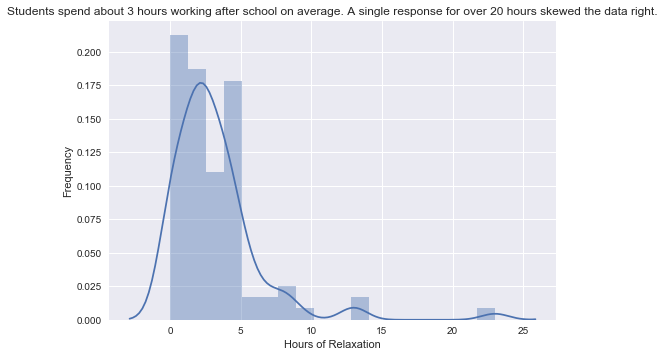

count    92.000000
mean      3.184783
std       3.293948
min       0.000000
25%       1.000000
50%       2.250000
75%       4.000000
max      23.000000
Name: HoursRelaxing, dtype: float64

In [34]:
#HoursRelaxing
sns.distplot(data['HoursRelaxing'])
plt.title('Students spend about 3 hours working after school on average. A single response for over 20 hours skewed the data right.')
plt.xlabel('Hours of Relaxation')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Plots/HoursRelaxing.png')
data['HoursRelaxing'].describe()

The data in this column is plagued by the same problem as HoursWork. A better way to word this question could be "How many hours did you relax YESTERDAY after you left school?" Given this ambiguity, I am not going to use the HoursWork column for any predictive models.

#### Explore RelaxActivity

I will first do text analysis on the RelaxActivity Column to identify the keywords. Then I will explore the one hot encoded columns.

In [35]:
word_list = []
for i, row in data.iterrows():
    word_list.extend(str(data.loc[i, 'RelaxActivity']).lower().split())
vocab_list = list(set(word_list))
print(len(vocab_list))

75


Interesting that the vocabulary is 75 words for 92 responses. Let's see which are the most popular words.

In [36]:
word_count = []
for word in vocab_list:
    word_count.append(word_list.count(word))

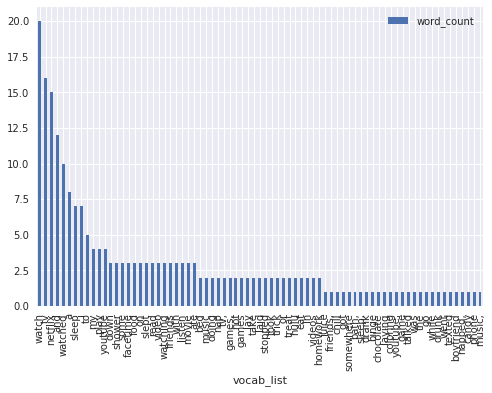

In [37]:
vocabulary_summary = pd.DataFrame(
    {'vocab_list': vocab_list,
     'word_count': word_count
    })

vocabulary_summary.sort_values('word_count', ascending=False, inplace=True, kind='quicksort')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

vocabulary_summary.plot.bar(x = 'vocab_list', y = 'word_count')
plt.savefig('Plots/RelaxActivity.png')
plt.show()

The top few words are all part of the WatchVideo category. I am expecting to see that when I analyze the one hot encoded columns.

I generated a [word cloud](https://www.jasondavies.com/wordcloud/) using the word list. You can see it [here](https://github.com/albemlee/PTPracticeData/blob/master/Plots/WordCloud.png).

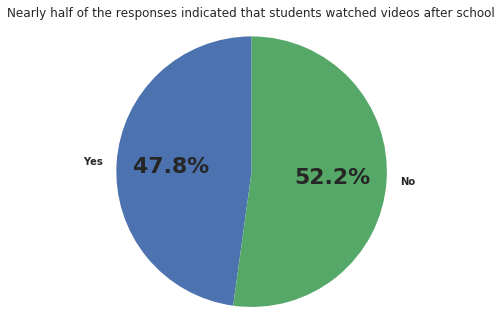

In [38]:
#WatchVideo
responses = len(data['WatchVideo'])
response_positives = sum(data['WatchVideo'])
response_negatives = responses - response_positives

labels = ['Yes', 'No']
responses_data = [response_positives, response_negatives]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.pie(responses_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Nearly half of the responses indicated that students watched videos after school')
plt.savefig('Plots/WatchVideo.png')
plt.show()

This is consistent with our observation earlier!

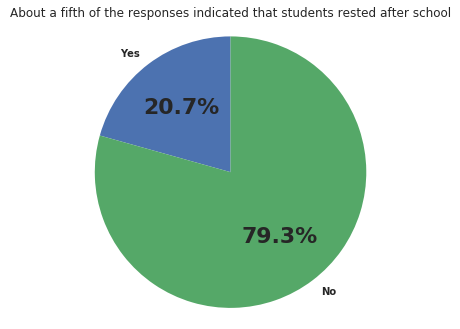

In [39]:
#Rest
responses = len(data['Rest'])
response_positives = sum(data['Rest'])
response_negatives = responses - response_positives

labels = ['Yes', 'No']
responses_data = [response_positives, response_negatives]

plt.pie(responses_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('About a fifth of the responses indicated that students rested after school')
plt.savefig('Plots/Rest.png')
plt.show()

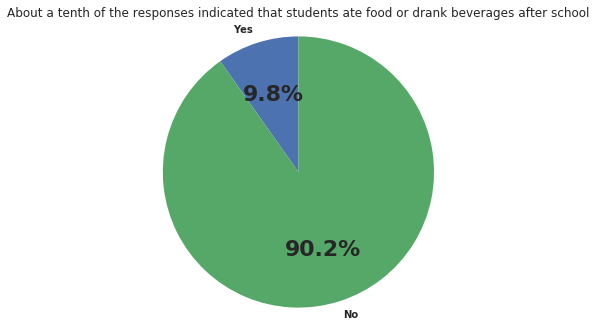

In [40]:
#EatDrink
responses = len(data['EatDrink'])
response_positives = sum(data['EatDrink'])
response_negatives = responses - response_positives

labels = ['Yes', 'No']
responses_data = [response_positives, response_negatives]

plt.pie(responses_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('About a tenth of the responses indicated that students ate food or drank beverages after school')
plt.savefig('Plots/EatDrink.png')
plt.show()

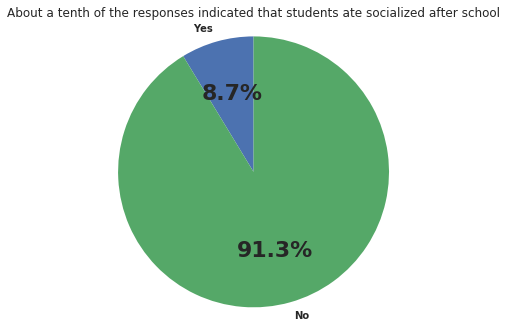

In [41]:
#Socialize
responses = len(data['Socialize'])
response_positives = sum(data['Socialize'])
response_negatives = responses - response_positives

labels = ['Yes', 'No']
responses_data = [response_positives, response_negatives]

plt.pie(responses_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('About a tenth of the responses indicated that students ate socialized after school')
plt.savefig('Plots/Socialize.png')
plt.show()

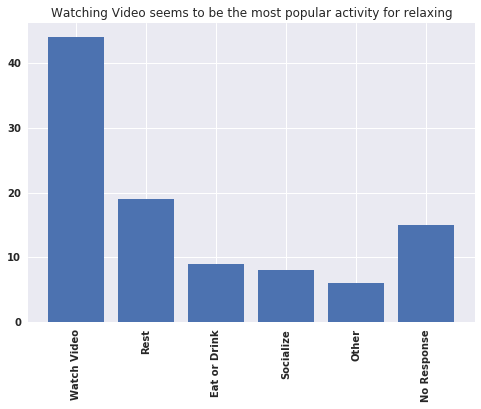

In [42]:
#Summary
labels = ['Watch Video', 'Rest', 'Eat or Drink', 'Socialize', 'Other', 'No Response']
response_data = [sum(data['WatchVideo']),
                 sum(data['Rest']),
                 sum(data['EatDrink']),
                 sum(data['Socialize']),
                 sum(data['Other']),
                 sum(data['NoResponse'])]

plt.bar(range(6), response_data)
plt.title('Watching Video seems to be the most popular activity for relaxing')
plt.xticks(range(6), labels, rotation='vertical')
plt.savefig('Plots/Activities.png')
plt.show()

#### Explore Feel

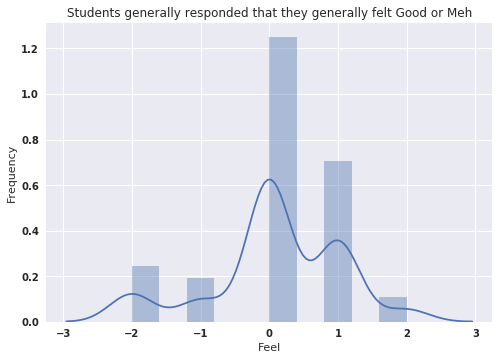

count    92.000000
mean      0.097826
std       0.961452
min      -2.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: Feel, dtype: float64

In [43]:
sns.distplot(data['Feel'])
plt.title('Students generally responded that they generally felt Good or Meh')
plt.xlabel('Feel')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Plots/Feel.png')
data['Feel'].describe()

I wonder if any students who responded "Meh" did so because they were reluctant to respond negatively.

#### Explore PersonalDescription

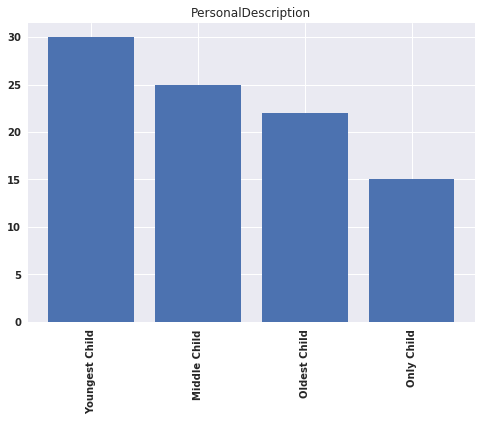

In [44]:
labels = ['Youngest Child', 'Middle Child', 'Oldest Child', 'Only Child']
response_data = [len(data['PersonalDescription'][data['PersonalDescription'] == 'Youngest Siblling']),
                 len(data['PersonalDescription'][data['PersonalDescription'] == 'Middle Sibling']),
                 len(data['PersonalDescription'][data['PersonalDescription'] == 'Oldest Sibling']),
                 len(data['PersonalDescription'][data['PersonalDescription'] == 'Only Child'])]

plt.bar(range(4), response_data)
plt.title('PersonalDescription')
plt.xticks(range(4), labels, rotation='vertical')
plt.savefig('Plots/PersonalDescription.png')
plt.show()

## Further Analysis

Given the small size of the dataset and the short duration it was collected, I do not think we could build a [predictive](https://en.wikipedia.org/wiki/Predictive_modelling) or [prescriptive model](https://en.wikipedia.org/wiki/Prescriptive_analytics) that would generalize well. However, I could test for correlation. I will test for correlation on the following variables:
1. HoursSleep and WatchVideo
2. HoursSleep and Rest
3. HoursSleep and EatDrink
4. HoursSleep and Socialize
5. HoursSleep and Feel

#### Correlation between HoursSleep and WatchVideo

HoursSleep is a continuous variable and WatchVideo is a binary variable. [Point-Biserial Correlation](http://www.statisticssolutions.com/point-biserial-correlation/) is a good measure of correlation for this.

In [45]:
from scipy import stats
continuous = data['HoursSleep']
boolean = data['WatchVideo']
r, p_value = stats.pointbiserialr(boolean, continuous)
print('r: %s' % r)
print('p_value: %s' % p_value)

r: 0.128951573659
p_value: 0.220548427399


H-null: There is no correlation between HoursSleep and WatchVideo

H-alternative: There is correlation between HoursSleep and WatchVideo

Based on a critical value of 0.05, we fail to reject the null hypothesis that there is no correlation between HoursSleep and WatchVideo.

#### Correlation between HoursSleep and Rest

In [46]:
continuous = data['HoursSleep']
boolean = data['Rest']
r, p_value = stats.pointbiserialr(boolean, continuous)
print('r: %s' % r)
print('p_value: %s' % p_value)

r: 0.0332595004987
p_value: 0.752959643891


H-null: There is no correlation between HoursSleep and Rest

H-alternative: There is correlation between HoursSleep and Rest

Based on a critical value of 0.05, we fail to reject the null hypothesis that there is no correlation between HoursSleep and Rest.

#### Correlation between HoursSleep and EatDrink

In [47]:
continuous = data['HoursSleep']
boolean = data['EatDrink']
r, p_value = stats.pointbiserialr(boolean, continuous)
print('r: %s' % r)
print('p_value: %s' % p_value)

r: -0.0209463994008
p_value: 0.842899896276


H-null: There is no correlation between HoursSleep and Rest

H-alternative: There is correlation between HoursSleep and Rest

Based on a critical value of 0.05, we fail to reject the null hypothesis that there is no correlation between HoursSleep and Rest.

#### Correlation between HoursSleep and Socialize

In [48]:
continuous = data['HoursSleep']
boolean = data['Socialize']
r, p_value = stats.pointbiserialr(boolean, continuous)
print('r: %s' % r)
print('p_value: %s' % p_value)

r: -0.0401534027745
p_value: 0.703926580133


H-null: There is no correlation between HoursSleep and Socialize

H-alternative: There is correlation between HoursSleep and Socialize

Based on a critical value of 0.05, we fail to reject the null hypothesis that there is no correlation between HoursSleep and Socialize.

#### Correlation between HourSleep and Feel

HoursSleep is a continuous variable and Feel is a discrete ordinal variable. [Spearman's Rank Correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) is a good measure of correlation for this.

In [49]:
continuous = data['HoursSleep']
ordinal = data['Feel']
rho, p_value = stats.pointbiserialr(boolean, continuous)
print('rho: %s' % rho)
print('p_value: %s' % p_value)

rho: -0.0401534027745
p_value: 0.703926580133


H-null: There is no correlation between HoursSleep and Feel
    
H-alternative: There is correlation between HoursSleep and Feel
    
Based on a critical value of 0.05, we fail to reject the null hypothesis that there is no correlation between HoursSleep and Feel.